In [1]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os.path
import scipy 
import scipy.stats as stats
import statsmodels as smr
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

/Users/marika/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
class Project:   
    def __init__(self):
        self.data = None
        self.train_data = None
        self.test_data = None
            
    def _load_data_(self,filepath):
      
        #if (~os.path.isfile('train.csv')) | (~os.path.isfile('test.csv')):
           # self.data = pd.read_csv(filepath,encoding='ISO-8859-1')
           # self.train_test_split()
           # self._write_data_()
            
        self.train_data = pd.read_csv('train.csv')
                                #,encoding='ISO-8859-1')
        self.test_data = pd.read_csv('test.csv',encoding='ISO-8859-1')
        return self.train_data
        
    def _write_data_(self):
        self.train_data.to_csv('train.csv')
        self.test_data.to_csv('test.csv')
    
    def train_test_split(self):
        self.train_data, self.test_data = train_test_split(self.data, test_size=0.2, random_state=42)   
        
    def null_summary(self,df):
        print(df.isnull().sum())
        all_data_na = (df.isnull().sum() / len(df)) * 100
        all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
        missing_data.head()
        if missing_data.size> 0:
            f, ax = plt.subplots(figsize=(15, 12))
            plt.xticks(rotation='90')
            sns.barplot(x=all_data_na.index, y=all_data_na)
            plt.xlabel('Features', fontsize=15)
            plt.ylabel('Percent of missing values', fontsize=15)
            plt.title('Percent missing data by feature', fontsize=15)
            plt.show()
            
    def get_stats(self,df,variable):
        print("Skewness: %f" % df[variable].skew())
        print("Kurtosis: %f" % df[variable].kurt())
        print("Mean: %f" % df[variable].mean())
        print("Variance: %f" % (df[variable].var()))

            
    def correlation_map(self,df,outcome,k):
        corrmat = df.corr()
        col_large = corrmat.nlargest(k+1,outcome)[outcome].index
        col_small = corrmat.nsmallest(k,outcome)[outcome].index
        cols = col_large.union(col_small)
        cm = np.corrcoef(corrmat[cols].loc[cols].values.T)
        print(corrmat[cols].loc[outcome])
        #sns.set(font_scale=1.25)
        hm = sns.heatmap(cm, cbar=True, vmax=1,annot=True, fmt='.1f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
        return cols
    
    def encode_organization(self,x):
            if 'Academy' in x:
                return 1
            elif 'Instituion' in x:
                return 2
            elif 'College' in x:
                return 3
            elif 'University' in x:
                return 4
            else:
                return 0
    
    def encode_cost(self,df):
        prices = []
        for i in range(len(df)):
            if pd.notnull(df['NPT4_PUB'][i]):
                prices.append(df['NPT4_PUB'][i])
            elif pd.notnull(df['NPT4_PRIV'][i]):
                prices.append(df['NPT4_PRIV'][i])
            else:
                prices.append(np.NaN) 
        
        df.loc[:,'NET_COST'] = pd.Series(prices, index=df.index)
        
        return df
    
    def encode_25KBinary(self, df):
        vals = []
        for i in range(len(df)):
            if float(df['gt_25k_p6'][i]) >= 0.6:
                vals.append(1)
            elif float(df['gt_25k_p6'][i]) < 0.6:
                vals.append(0)
            else:
                vals.append(np.NaN)
        
        df.loc[:,'Binary_25k'] = pd.Series(vals, index=df.index)
        
        return df
    
    def encode_state(self,x):
        west = ['WA','MT','OR','ID','WT','CA','NV','UT','CO','AZ','NM']
        midwest = ['ND','MN','SD','NE','KS','IA','MO','WI','IL','MI','IN','OH','WY']
        northeast = ['NY','PA','NJ','RI','CT','MA','VT','NH','ME']
        south = ['TX','OK','AR','LA','MS','AL','GA','TN','KY','WV','DC','MD','VA','DE','NC','SC','FL']
        others =['AK','HI','PR','PW','AS','GU','FM','VI']
        
        if x in others:
            return 0
        elif x in midwest:
            return 1
        elif x in south:
            return 2
        elif x in west:
            return 3
        elif x in northeast:
            return 4
        else: return x
        
    def compute_ci(self,x):
        print('tn,p,dof =',sms.DescrStatsW(x).ttest_mean(x.mean()))
        print('CI =',sms.DescrStatsW(x).tconfint_mean())

In [4]:
project = Project()
project._load_data_('train.csv')

,Unnamed: 0,INSTNM,CITY,STABBR,PREDDEG,CONTROL,LOCALE,SATVRMID,SATMTMID,SATWRMID,...,RET_PTL4,PCTFLOAN,UG25abv,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,md_earn_wne_p10,gt_25k_p6
0,7440,Marian Health Careers Center-Van Nuys Campus,Van Nuys,CA,1,3,11.0,NaN,NaN,NaN,...,NaN,0.6786,0.5745,15680,174.080144,0.847161572,NaN,0.27471978,47500,0.767567575
1,5144,Emma's Beauty Academy-Juana Diaz,Juana Diaz,PR,1,3,23.0,NaN,NaN,NaN,...,NaN,0.0000,0.1733,NaN,NaN,PrivacySuppressed,NaN,0.703098375,13400,0.181818187
2,7169,Milan Institute-Nampa,Nampa,ID,1,3,22.0,NaN,NaN,NaN,...,NaN,0.4332,0.4314,9500,105.469475,0.351691581,NaN,NaN,16100,0.249343827
3,5160,University of Phoenix-Bay Area Campus,San Jose,CA,3,3,11.0,NaN,NaN,NaN,...,NaN,0.6299,0.8464,35500,394.122775,0.406534043,0.135344954,NaN,53400,0.705231071
4,4987,Sanford-Brown Institute-Tampa,Tampa,FL,1,3,21.0,NaN,NaN,NaN,...,NaN,0.6094,0.4858,9500,105.469475,0.409117821,NaN,0.596397059,28300,0.524061024
5,2415,Truckee Meadows Community College,Reno,NV,2,1,12.0,NaN,NaN,NaN,...,0.4680,0.1438,0.3980,10000,111.0205,0.551597052,NaN,0.203587983,32500,0.543252587
6,6076,Healing Arts Institute,Perrysburg,OH,1,3,21.0,NaN,NaN,NaN,...,NaN,0.6197,0.6250,7917,87.89492985,0.755102041,NaN,NaN,NaN,PrivacySuppressed
7,1790,Maryland University of Integrative Health,Laurel,MD,4,2,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN
8,7170,Milan Institute of Cosmetology-El Paso,El Paso,TX,1,3,11.0,NaN,NaN,NaN,...,NaN,0.4466,0.4847,14252,158.2264166,0.291276491,NaN,NaN,18900,0.228511527
9,3857,Middle Tennessee State University,Murfreesboro,TN,3,1,12.0,515.0,510.0,NaN,...,NaN,0.5732,0.2315,22170.5,246.1379995,0.739414441,0.453413673,NaN,36100,0.592180908


In [38]:
df = project.train_data
df = df.drop(df.columns[0],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6243 entries, 0 to 6242
Data columns (total 42 columns):
INSTNM                    6243 non-null object
CITY                      6243 non-null object
STABBR                    6243 non-null object
PREDDEG                   6243 non-null int64
CONTROL                   6243 non-null int64
LOCALE                    5911 non-null float64
SATVRMID                  1036 non-null float64
SATMTMID                  1048 non-null float64
SATWRMID                  631 non-null float64
ACTCMMID                  1076 non-null float64
ACTENMID                  939 non-null float64
ACTMTMID                  940 non-null float64
ACTWRMID                  247 non-null float64
SAT_AVG                   1136 non-null float64
DISTANCEONLY              5913 non-null float64
UGDS                      5680 non-null float64
UGDS_WHITE                5680 non-null float64
UGDS_BLACK                5680 non-null float64
UGDS_HISP                 5680 non-null 

In [39]:
df = df.apply(lambda x: x.replace('PrivacySuppressed',np.NAN))
df = project.encode_cost(df)
df = project.encode_25KBinary(df)

In [40]:
df['RPY_3YR_RT_SUPP'] = pd.to_numeric(df['RPY_3YR_RT_SUPP'])
df['md_earn_wne_p10'] = pd.to_numeric(df['md_earn_wne_p10'])
df['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(df['GRAD_DEBT_MDN_SUPP'])
df['GRAD_DEBT_MDN10YR_SUPP'] = pd.to_numeric(df['GRAD_DEBT_MDN10YR_SUPP'])
df['C150_4_POOLED_SUPP'] = pd.to_numeric(df['C150_4_POOLED_SUPP'])
df['C200_L4_POOLED_SUPP'] = pd.to_numeric(df['C200_L4_POOLED_SUPP'])

In [41]:
columns = df.columns
#drop outcomes variables and "name" variables 
treatment_variables = columns.drop(['INSTNM','CITY','STABBR','RPY_3YR_RT_SUPP', 'md_earn_wne_p10', 'gt_25k_p6', 'Binary_25k'])

In [42]:
#only keep the variables if less than 20% of the values are missing ( SHOULD I KEEP IT at 20%?)
keep_variables = []
for i in range(len(treatment_variables)):
    x = df[str(treatment_variables[i])].isnull().sum()/float((len(df)))
    if x <= 0.2:
        keep_variables.append(treatment_variables[i]) 

In [43]:
np.mean(df['RPY_3YR_RT_SUPP'])

0.5985876295933767

In [44]:
np.mean(df['Binary_25k'])

0.30540938749736896

In [45]:
folds = 100
shuffled = df.sample(frac=1)
print (len(shuffled))
idxs = np.arange(len(shuffled),dtype='i')/int(np.ceil(len(shuffled)/float(folds)))
#ind_folds = np.array([i%folds for i in range(len(shuffled))])
#ind_foldsp
print idxs

6243
[ 0  0  0 ... 99 99 99]


In [46]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
    predictions = [np.mean(df['RPY_3YR_RT_SUPP']) for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.039234018427516296
3.493476551474056e-05


In [47]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
    predictions = [0 for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.26
0.0


In [48]:
drop_cols = []
for i in df.columns:
    if i =='RPY_3YR_RT_SUPP':
        next
    elif i == 'Binary_25k':
        next
    elif i not in keep_variables:
        drop_cols.append(i)
    elif i == 'GRAD_DEBT_MDN10YR_SUPP':
        drop_cols.append(i)
    elif i == 'UGDS_UNKN':
        drop_cols.append(i)

In [49]:
drop_cols

['INSTNM',
 'CITY',
 'STABBR',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'UGDS_UNKN',
 'NPT4_PUB',
 'NPT4_PRIV',
 'RET_FT4',
 'RET_FTL4',
 'RET_PT4',
 'RET_PTL4',
 'GRAD_DEBT_MDN10YR_SUPP',
 'C150_4_POOLED_SUPP',
 'C200_L4_POOLED_SUPP',
 'md_earn_wne_p10',
 'gt_25k_p6']

In [ ]:
#df2 has transformed the undergraduate racial percentages (except white) + UGDS

In [50]:
df2 = df.drop(drop_cols, axis = 1)

In [52]:
#df2.loc[:,'RPY_3YR_RT_SUPP'] = pd.Series(df.RPY_3YR_RT_SUPP, index=df2.index)
#df2.loc[:,'Binary_25k'] = pd.Series(df.Binary_25k,index=df2.index)

In [51]:
import scipy.special as sc

In [52]:
for i in range(len(df2.columns)):
    if 'UGDS' in df2.columns[i]:
        if 'UGDS_WHITE' == df2.columns[i]:
            next
        else:
            x = sc.boxcox(np.array(df2[df2.columns[i]]),0.5)
            df2.loc[:,df2.columns[i]] = pd.Series(x, index=df2.index)
    #if 'GRAD_DEBT' in df2.columns[i]:
        #x = sc.boxcox(np.array(df2[df2.columns[i]]),0.5)
        #df2.loc[:,df2.columns[i]] = pd.Series(x, index=df2.index)

In [53]:
df2.to_csv('./trans1.csv')

In [ ]:
#df3 has transformed the racial percentages (except white),
# the number of undergrads, and the PCTFLOAN (federal loan), and PPTUG_EF (part-time)

In [54]:
df3 = df.drop(drop_cols, axis = 1)

In [57]:
#df3.loc[:,'RPY_3YR_RT_SUPP'] = pd.Series(df.RPY_3YR_RT_SUPP, index=df3.index)
#df3.loc[:,'Binary_25k'] = pd.Series(df.Binary_25k,index=df3.index)

In [55]:
for i in range(len(df3.columns)):
    if 'UGDS' in df3.columns[i]:
        if 'UGDS_WHITE' == df3.columns[i]:
            next
        else:
            x = sc.boxcox(np.array(df3[df3.columns[i]]),0.5)
            df3.loc[:,df3.columns[i]] = pd.Series(x, index=df3.index)
    if 'PCTFLOAN' in df3.columns[i]:
        x = sc.boxcox(np.array(df3[df3.columns[i]]),2)
        df3.loc[:,df3.columns[i]] = pd.Series(x, index=df3.index)
    if 'PPTUG_EF' in df3.columns[i]:
        x = sc.boxcox(np.array(df3[df3.columns[i]]),2)
        df3.loc[:,df3.columns[i]] = pd.Series(x, index=df3.index)

In [56]:
df3.to_csv('./trans2.csv')

In [57]:
df = df.drop(drop_cols, axis = 1)

In [ ]:
#plot the original variables on a qqplot

In [61]:
random_subset = df[:600]

In [62]:
import scipy as sp

PREDDEG


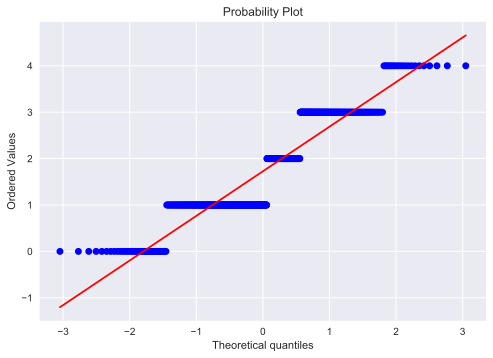

CONTROL


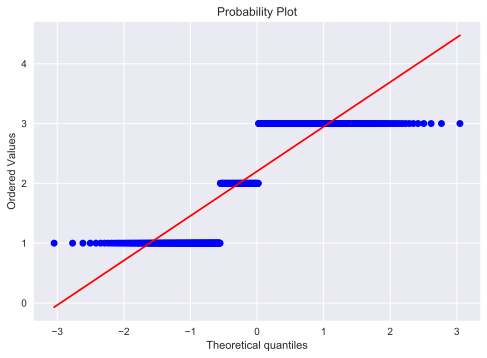

LOCALE


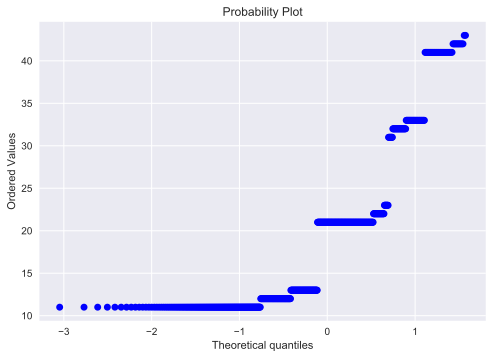

DISTANCEONLY


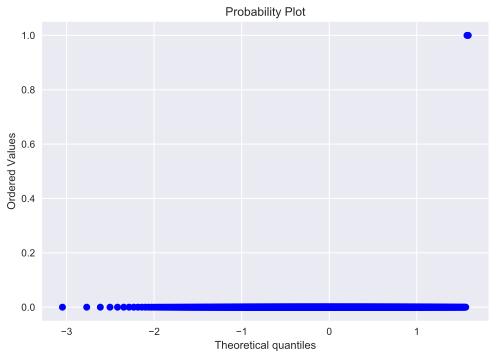

UGDS


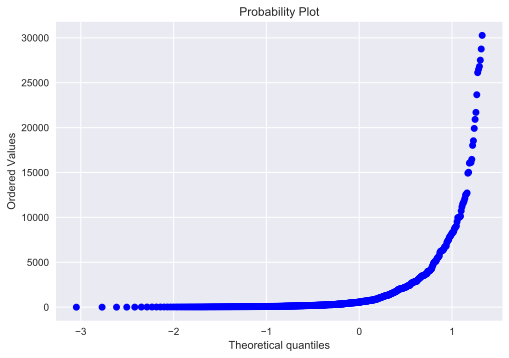

UGDS_WHITE


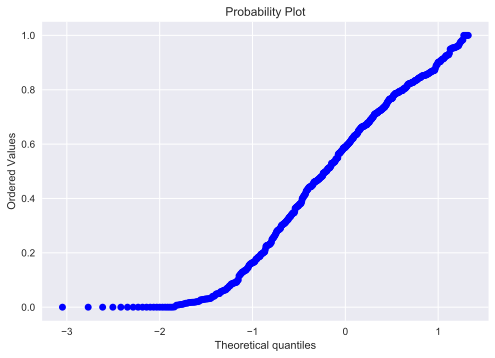

UGDS_BLACK


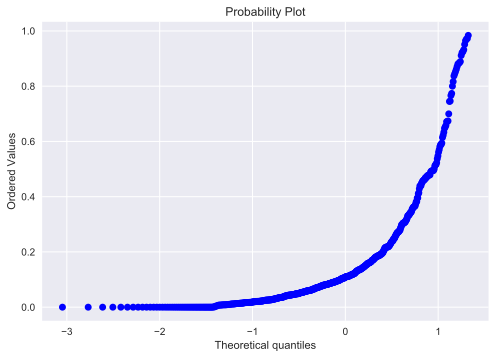

UGDS_HISP


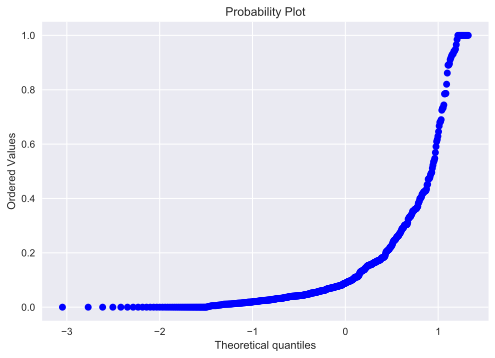

UGDS_ASIAN


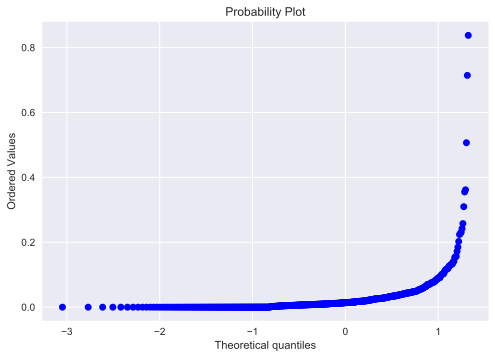

UGDS_AIAN


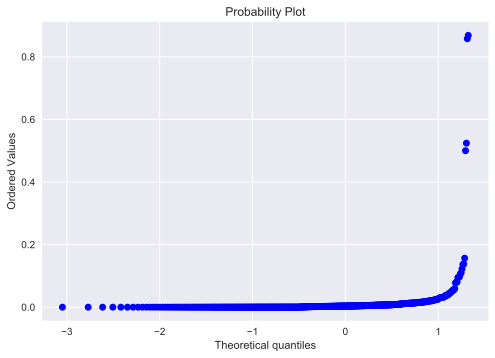

UGDS_NHPI


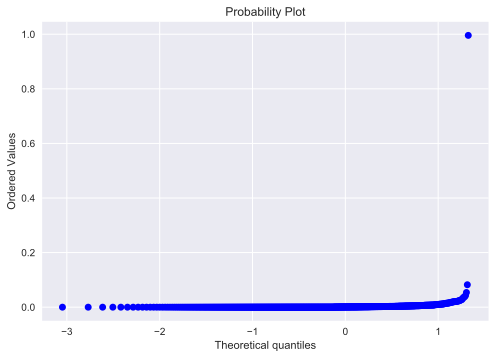

UGDS_2MOR


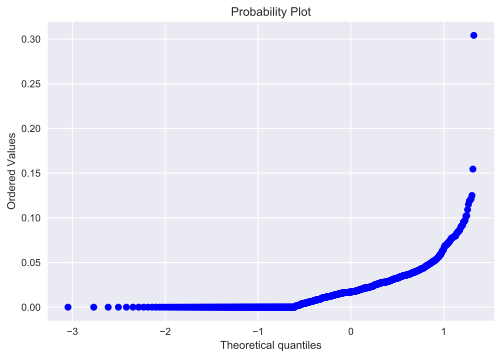

UGDS_NRA


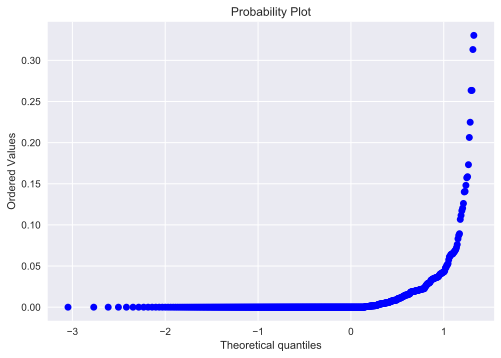

PPTUG_EF


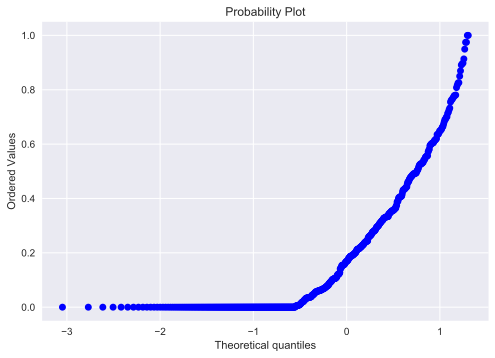

PCTPELL


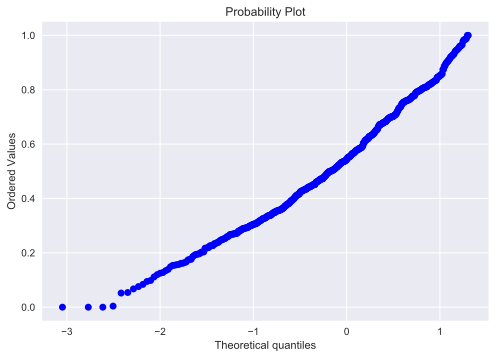

PCTFLOAN


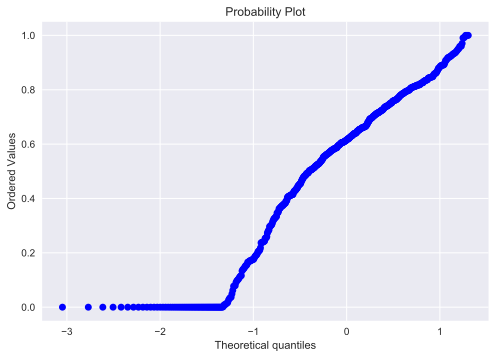

UG25abv


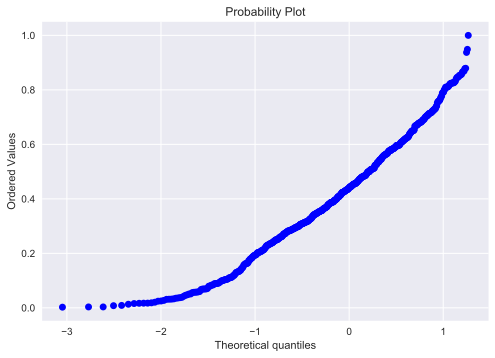

GRAD_DEBT_MDN_SUPP


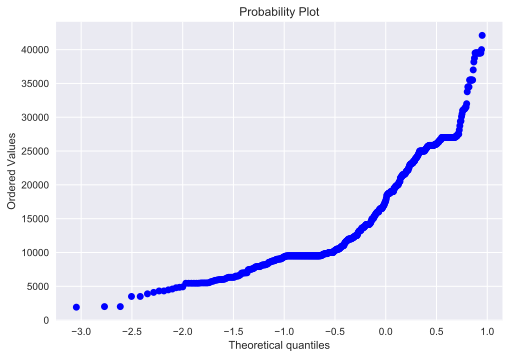

NET_COST


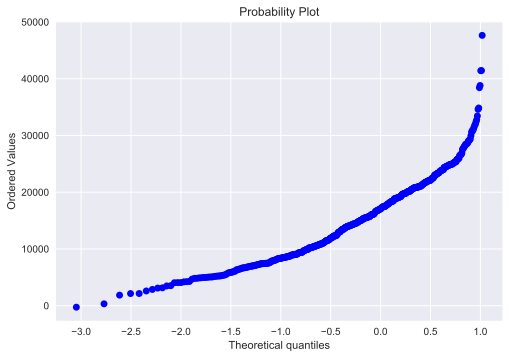

In [39]:
for i in range(len(random_subset.columns)):
    print (random_subset.columns[i])
    #sm.qqplot(random_subset[random_subset.columns[i]], line='s')
    stats.probplot(random_subset[random_subset.columns[i]], dist="norm", plot=pylab)
    plt.show()

In [ ]:
#Guess Baseline - Linear Regression

In [58]:
total = 'CONTROL + PREDDEG + UGDS_WHITE + UGDS_BLACK + UG25abv'

In [59]:
smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     992.6
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:40:09   Log-Likelihood:                 2461.5
No. Observations:                4710   AIC:                            -4911.
Df Residuals:                    4704   BIC:                            -4872.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5923      0.013     46.133      0.000       0.567       0.617
CONTROL       -0.0235      0.003     -8.022      0.000      -0.029      -0.018
PREDDEG        0.0666      0.003     24.624      0.000       0.061       0.072
UGDS_WHITE     0.1416      0.009     15.032      0.000       0.123       0.160
UGDS_BLACK    -0.2324      0.012    -19.477      0.000      -0.256      -0.209
UG25abv       -0.2243      0.011    -21.196      0.000      -0.245      -0.204
==============================================================================
Omnibus:                       25.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.172
Skew:                           0.146   Prob(JB):                     1.26e-06
Kurtosis:                       3.231   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.018940794433881948
3.486925384749193e-19


In [61]:
shuffled2 = df2.sample(frac = 1)
shuffled3 = df3.sample(frac = 1)

In [62]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.02273110481297904
0.0


In [63]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.01681915673004864
3.486925384749193e-19


In [ ]:
#Guess Baseline - Logistic Regression

In [64]:
total2 = 'PREDDEG + PCTPELL + GRAD_DEBT_MDN_SUPP + NET_COST'

In [65]:
smf.logit('Binary_25k ~ ' + total2 , data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.399775
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3900
Model:                          Logit   Df Residuals:                     3895
Method:                           MLE   Df Model:                            4
Date:                Thu, 26 Apr 2018   Pseudo R-squ.:                  0.3514
Time:                        22:43:20   Log-Likelihood:                -1559.1
converged:                       True   LL-Null:                       -2404.0
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.9345      0.225     -8.611      0.000      -2.375      -1.494
PREDDEG                0.8007      0.086      9.359      0.000       0.633       0.968
PCTPELL               -5.2507      0.290    -18.117      0.000      -5.819      -4.683
GRAD_DEBT_MDN_SUPP  5.824e-05   8.87e-06      6.564      0.000    4.08e-05    7.56e-05
NET_COST            4.539e-05   7.24e-06      6.271      0.000    3.12e-05    5.96e-05
======================================================================================
"""

In [66]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + total2, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
  

Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401127
  

In [68]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + total2, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
  

Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398040
  

In [69]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + total2, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
  

Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399116
  

In [70]:
import itertools

In [71]:
singlefeatures=list(set(df.columns)-{'RPY_3YR_RT_SUPP'} - {'Binary_25k'})
print singlefeatures

['CONTROL', 'UGDS_AIAN', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'LOCALE', 'UGDS_NRA', 'UGDS_ASIAN', 'PCTPELL', 'NET_COST', 'UGDS_2MOR', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'UGDS_WHITE', 'PCTFLOAN', 'UGDS_HISP']


In [72]:
interactions = ['%s:%s'%v for v in itertools.combinations(singlefeatures,2)]
print interactions[:10]

['CONTROL:UGDS_AIAN', 'CONTROL:PPTUG_EF', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'CONTROL:PREDDEG', 'CONTROL:UG25abv', 'CONTROL:LOCALE', 'CONTROL:UGDS_NRA', 'CONTROL:UGDS_ASIAN', 'CONTROL:PCTPELL', 'CONTROL:NET_COST']


In [ ]:
#All Single Features - Linear Regression

In [73]:
 smf.ols('RPY_3YR_RT_SUPP~ ' + '+'.join(singlefeatures), data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     506.9
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:46:37   Log-Likelihood:                 3261.9
No. Observations:                4309   AIC:                            -6484.
Df Residuals:                    4289   BIC:                            -6356.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6895      0.023     30.417      0.000       0.645       0.734
CONTROL               -0.0386      0.004    -10.878      0.000      -0.046      -0.032
UGDS_AIAN             -0.1801      0.058     -3.096      0.002      -0.294      -0.066
PPTUG_EF              -0.0138      0.009     -1.486      0.137      -0.032       0.004
GRAD_DEBT_MDN_SUPP -3.787e-06   3.67e-07    -10.312      0.000   -4.51e-06   -3.07e-06
PREDDEG                0.0501      0.004     13.376      0.000       0.043       0.057
UG25abv               -0.1275      0.011    -11.565      0.000      -0.149      -0.106
LOCALE                -0.0004      0.000     -1.562      0.118      -0.001    8.95e-05
UGDS_NRA               0.3727      0.065      5.724      0.000       0.245       0.500
UGDS_ASIAN             0.6097      0.042     14.668      0.000       0.528       0.691
PCTPELL               -0.4972      0.015    -32.472      0.000      -0.527      -0.467
NET_COST            9.652e-07    3.5e-07      2.754      0.006    2.78e-07    1.65e-06
UGDS_2MOR              0.0652      0.068      0.955      0.340      -0.069       0.199
UGDS_NHPI             -0.3818      0.113     -3.371      0.001      -0.604      -0.160
UGDS_BLACK            -0.0911      0.018     -4.979      0.000      -0.127      -0.055
UGDS               -1.827e-06   4.01e-07     -4.555      0.000   -2.61e-06   -1.04e-06
DISTANCEONLY           0.0470      0.029      1.616      0.106      -0.010       0.104
UGDS_WHITE             0.1419      0.017      8.228      0.000       0.108       0.176
PCTFLOAN               0.3188      0.014     23.618      0.000       0.292       0.345
UGDS_HISP              0.0755      0.019      3.969      0.000       0.038       0.113
==============================================================================
Omnibus:                      100.619   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.880
Skew:                           0.114   Prob(JB):                     4.39e-46
Kurtosis:                       4.054   Cond. No.                     1.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.01510590212993831
3.486925384749193e-19


In [79]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.013442347566775285
1.7434626923745965e-19


In [80]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ '+ '+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.008811788360078484
3.486925384749193e-19


In [ ]:
#All of the features - Logistic Regression

In [77]:
 smf.logit('Binary_25k~ ' + '+'.join(singlefeatures), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.340499
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3896
Model:                          Logit   Df Residuals:                     3876
Method:                           MLE   Df Model:                           19
Date:                Thu, 26 Apr 2018   Pseudo R-squ.:                  0.4475
Time:                        22:48:35   Log-Likelihood:                -1326.6
converged:                       True   LL-Null:                       -2400.9
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.5983      0.639     -2.501      0.012      -2.851      -0.346
CONTROL               -1.1036      0.107    -10.287      0.000      -1.314      -0.893
UGDS_AIAN             -9.9573      3.849     -2.587      0.010     -17.502      -2.413
PPTUG_EF              -1.9268      0.277     -6.954      0.000      -2.470      -1.384
GRAD_DEBT_MDN_SUPP  2.313e-05    1.1e-05      2.103      0.035    1.57e-06    4.47e-05
PREDDEG                0.8133      0.114      7.143      0.000       0.590       1.036
UG25abv                4.3175      0.343     12.580      0.000       3.645       4.990
LOCALE                -0.0020      0.006     -0.334      0.738      -0.014       0.010
UGDS_NRA              -3.7994      1.596     -2.381      0.017      -6.927      -0.672
UGDS_ASIAN             8.3411      1.271      6.561      0.000       5.849      10.833
PCTPELL               -9.9747      0.567    -17.591      0.000     -11.086      -8.863
NET_COST            4.038e-05   1.09e-05      3.713      0.000    1.91e-05    6.17e-05
UGDS_2MOR             -4.1091      2.101     -1.956      0.050      -8.226       0.008
UGDS_NHPI              3.2040      2.909      1.101      0.271      -2.497       8.905
UGDS_BLACK            -0.1907      0.521     -0.366      0.714      -1.212       0.831
UGDS                2.951e-05   1.03e-05      2.860      0.004    9.29e-06    4.97e-05
DISTANCEONLY           0.6921      0.752      0.920      0.357      -0.782       2.166
UGDS_WHITE            -0.0895      0.480     -0.186      0.852      -1.030       0.851
PCTFLOAN               5.9576      0.453     13.152      0.000       5.070       6.845
UGDS_HISP              0.5148      0.591      0.871      0.384      -0.643       1.673
======================================================================================
"""

In [82]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' +'+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
  

Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341332
  

In [81]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled2.iloc[np.where(idxs==i)]
    train = shuffled2.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' +'+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
  

Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337273
  

In [83]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled3.iloc[np.where(idxs==i)]
    train = shuffled3.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' +'+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
  

Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.355191
  